In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


In [ ]:
data = pd.read_csv('Tourism.csv')

In [ ]:
df= data.copy()
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
np.random.seed(15) 


There are 4888 rows and 20 columns.


In [ ]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

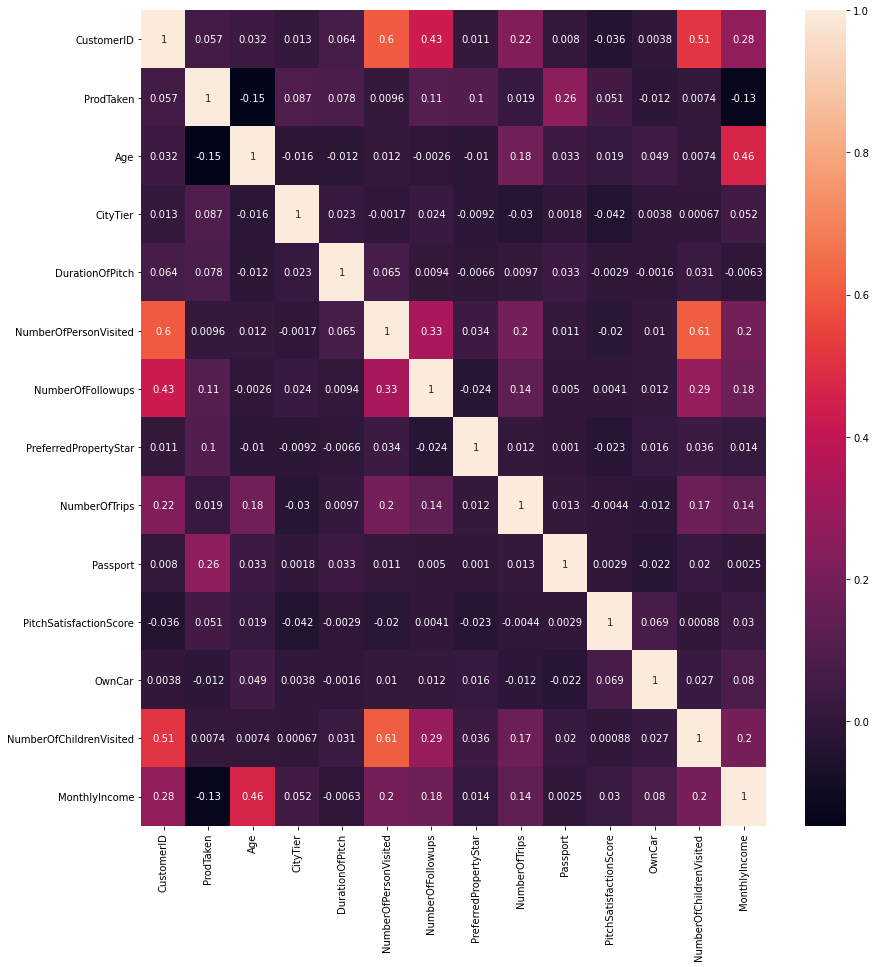

In [ ]:
plt.figure(figsize=(14,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Data Pre-Processing(EDA)

In [ ]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisited','NumberOfChildrenVisited','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']

In [ ]:
df[cat_cols] = df[cat_cols].astype('category')

In [ ]:
cols = data.select_dtypes(['object']) 
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ProdTaken                4888 non-null   category
 1   Age                      4662 non-null   float64 
 2   TypeofContact            4863 non-null   category
 3   CityTier                 4888 non-null   category
 4   DurationOfPitch          4637 non-null   float64 
 5   Occupation               4888 non-null   category
 6   Gender                   4888 non-null   category
 7   NumberOfPersonVisited    4888 non-null   category
 8   NumberOfFollowups        4843 non-null   float64 
 9   ProductPitched           4888 non-null   category
 10  PreferredPropertyStar    4862 non-null   category
 11  MaritalStatus            4888 non-null   category
 12  NumberOfTrips            4748 non-null   float64 
 13  Passport                 4888 non-null   category
 14  PitchSat

The datatypes have been fixed and the memory reduced.

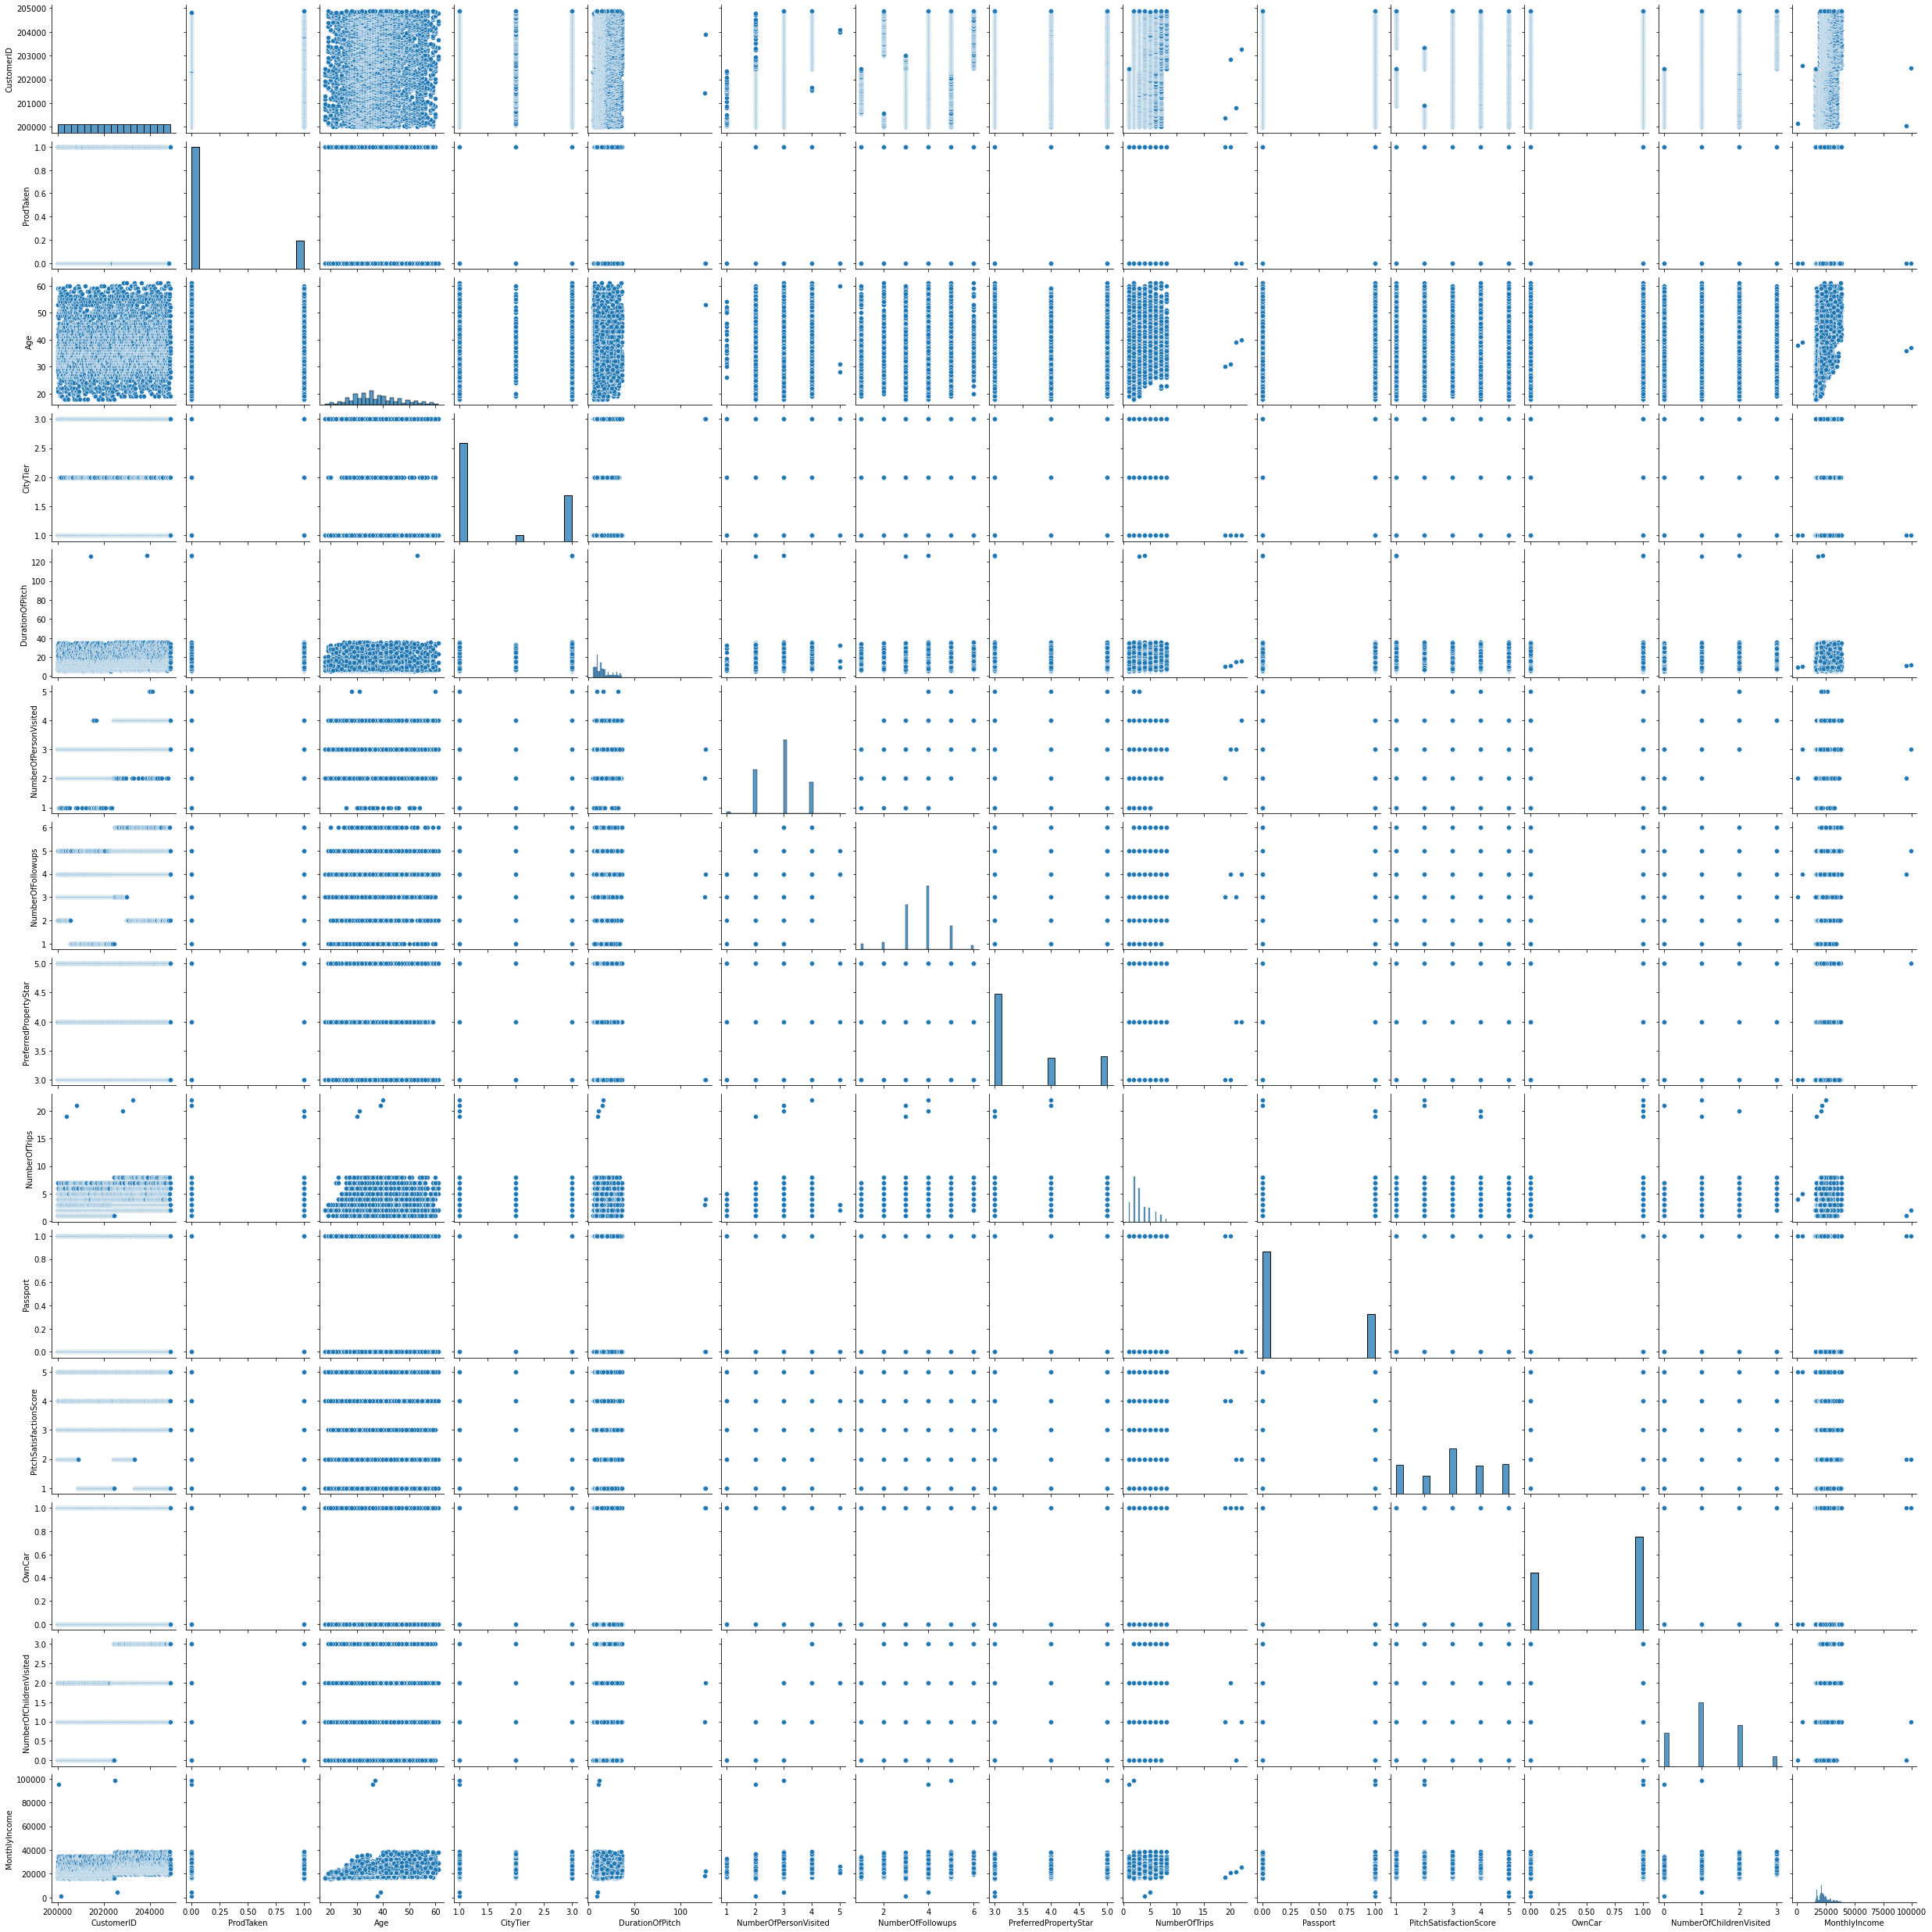

In [ ]:
sns.pairplot(df)

In [ ]:
df.isna().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [ ]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Age')
missing_numerical.remove('MonthlyIncome')
missing_numerical

['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips']

In [ ]:
medianFiller = lambda x: x.fillna(x.median())
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [ ]:
df["MonthlyIncome"] = df.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.0,22413.5,25424.75,98678.0


In [ ]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    2

In [ ]:
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')
df['NumberOfChildrenVisited'] = df['NumberOfChildrenVisited'].fillna(1.0)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

In [ ]:
df.Gender = df.Gender.replace('Fe Male','Female') 

In [ ]:
df.isnull().sum() 

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [ ]:
df.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisited,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


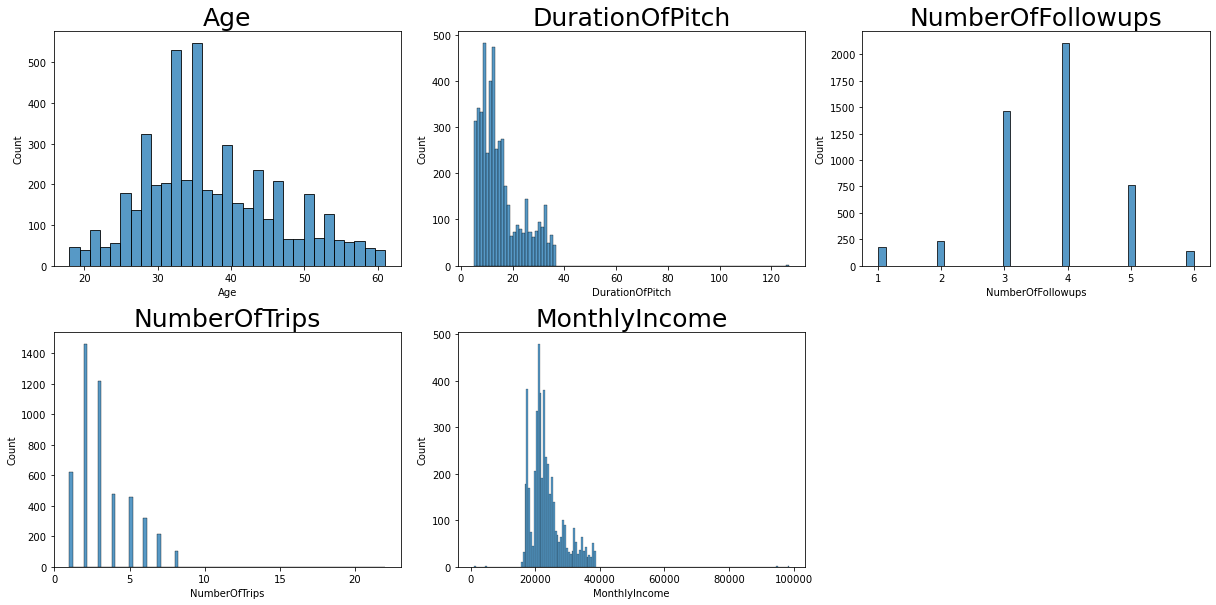

In [ ]:
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):   
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

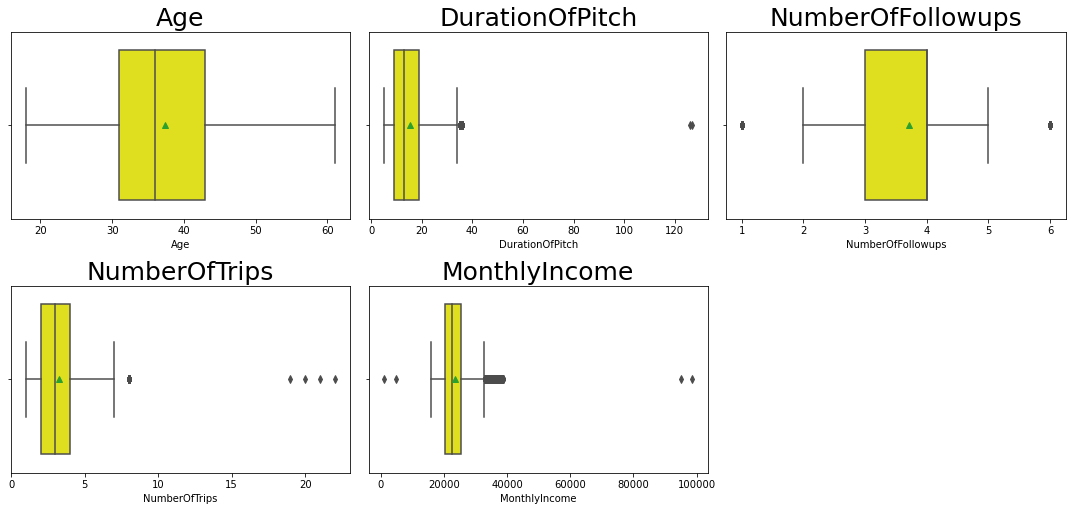

In [ ]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

In [ ]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

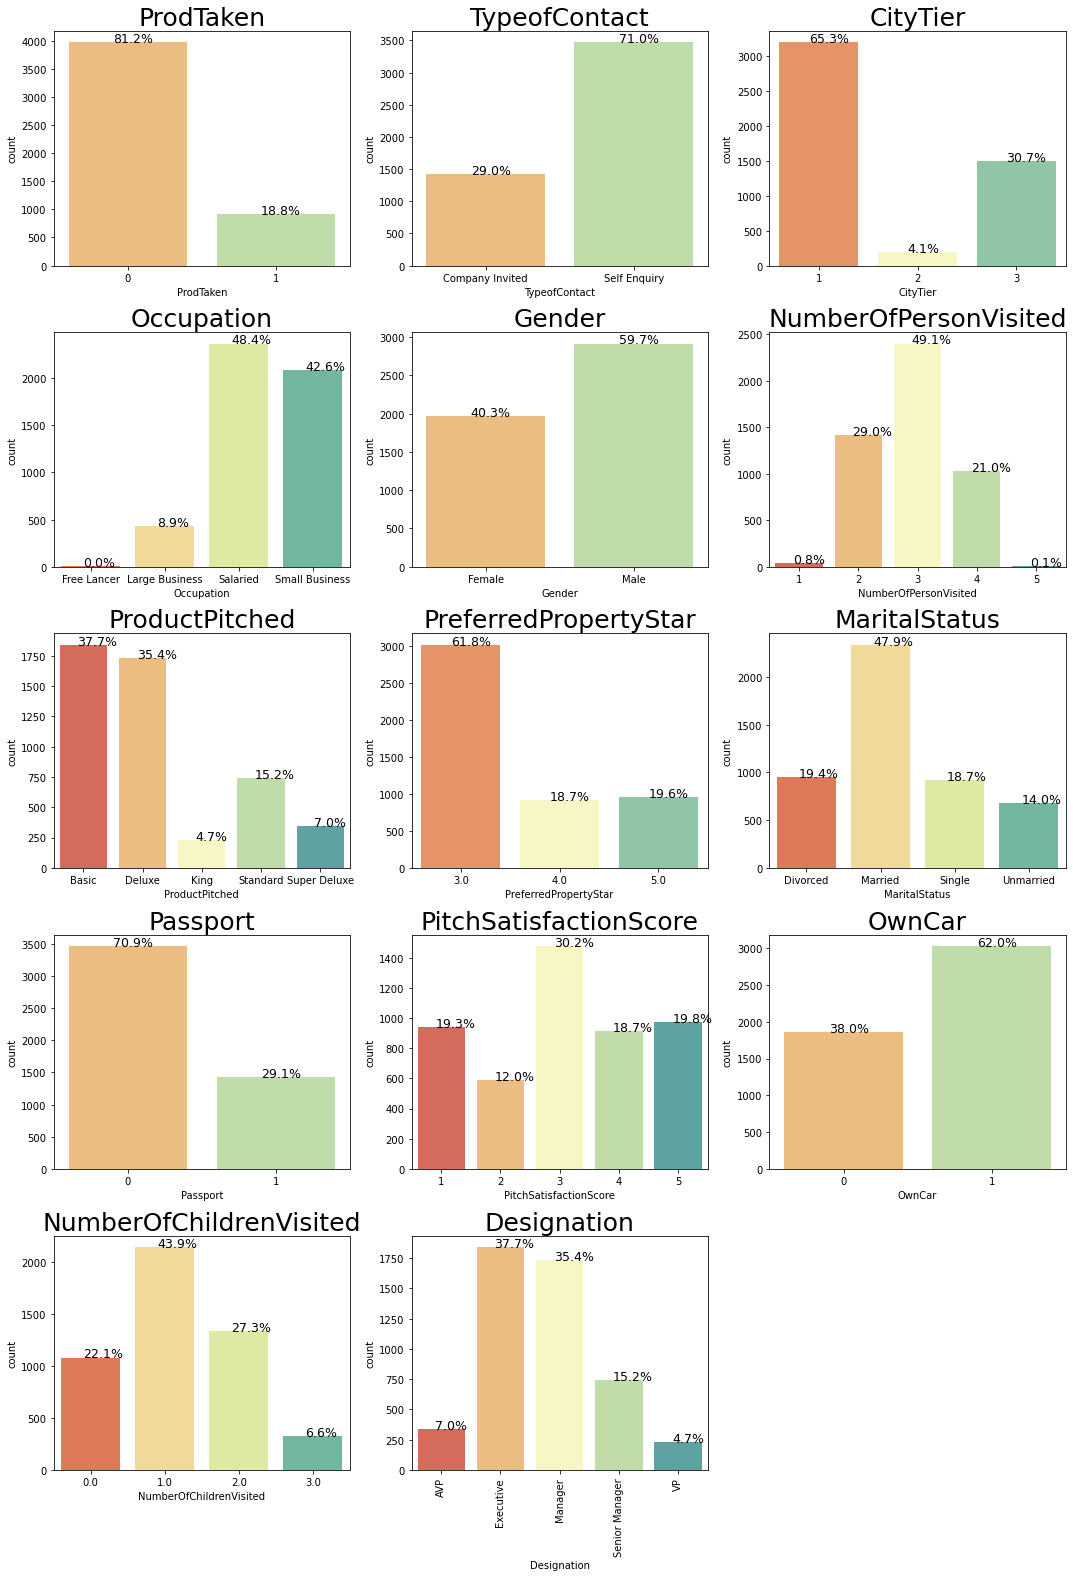

In [ ]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)): 
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + (p.get_width() / 2)-0.1  
        y = p.get_y() + p.get_height()          
        ax.annotate(percentage, (x, y), size = 12.5,color='black') 
plt.xticks(rotation=90)
plt.show()

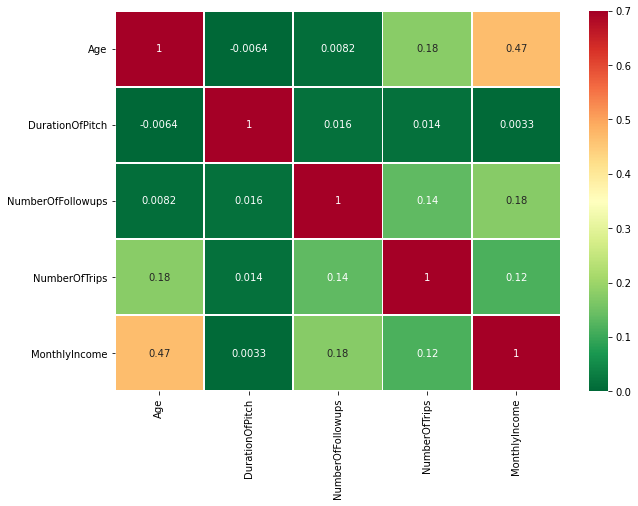

In [ ]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

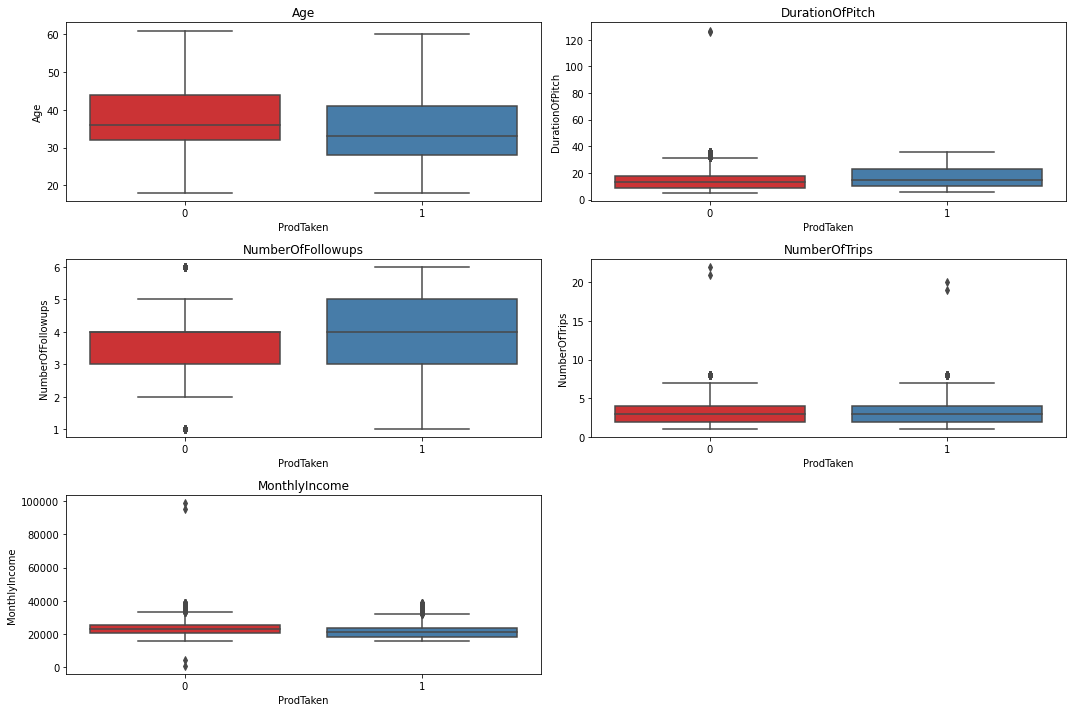

In [ ]:
plt.figure(figsize=(15,10))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [ ]:
def stacked_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


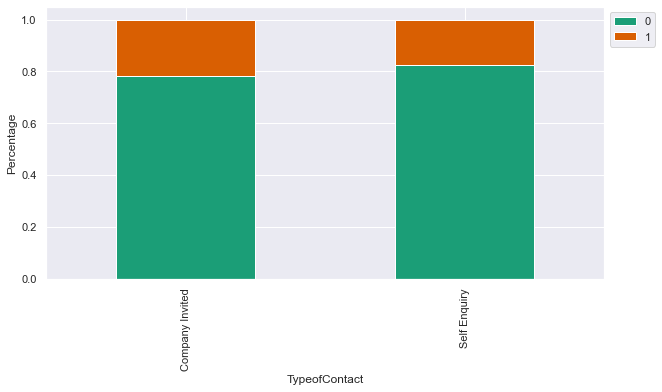

In [ ]:
stacked_plot(df.TypeofContact)

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


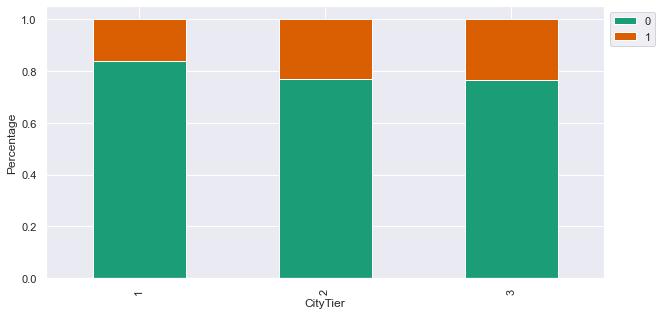

In [ ]:
stacked_plot(df.CityTier)

More Customers from Tier2 and Tier3 cities have purchased Air Travel Packages

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


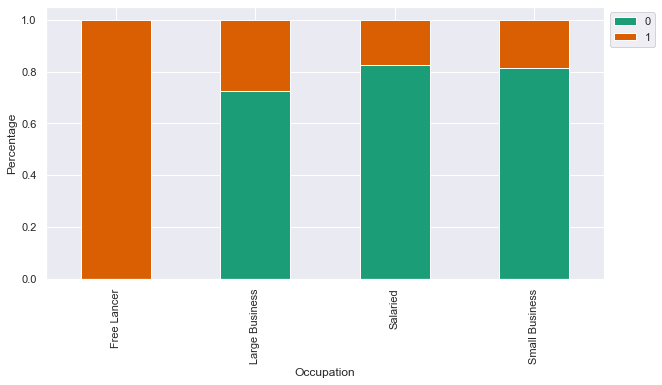

In [ ]:
stacked_plot(df.Occupation)

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


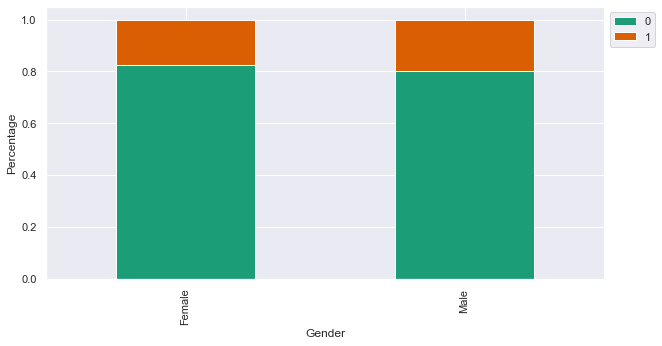

In [ ]:
stacked_plot(df.Gender)

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


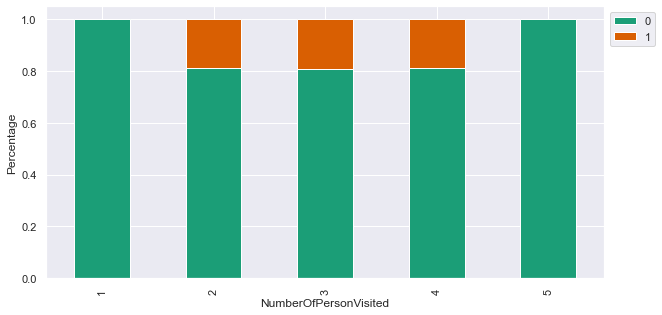

In [ ]:
stacked_plot(df.NumberOfPersonVisited)

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


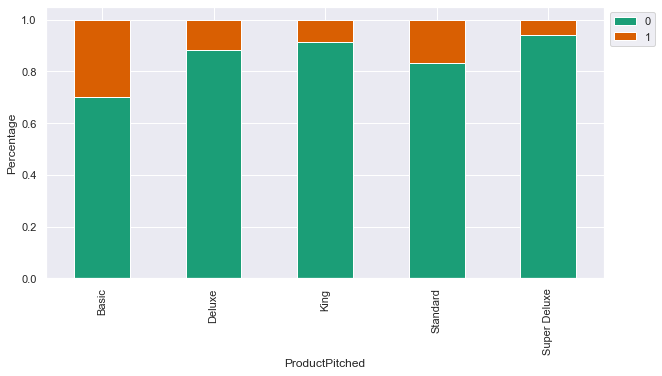

In [ ]:
stacked_plot(df.ProductPitched)

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


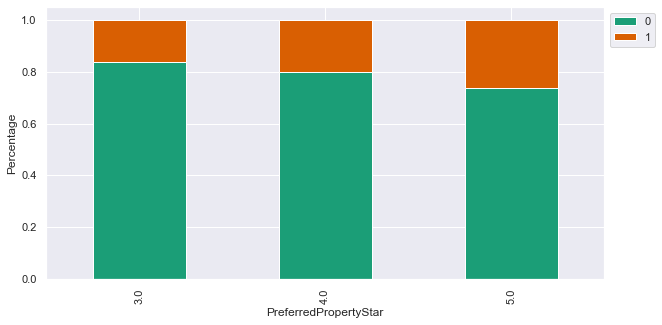

In [ ]:
stacked_plot(df.PreferredPropertyStar)

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


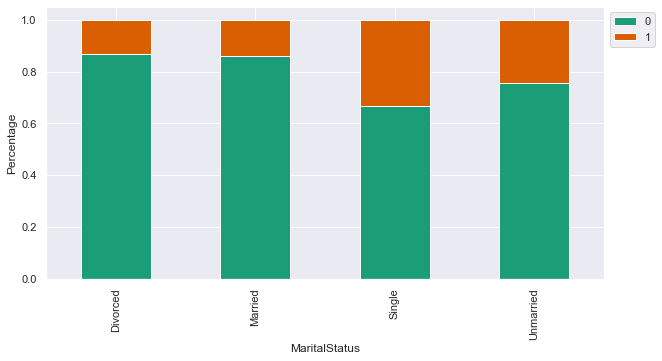

In [ ]:
stacked_plot(df.MaritalStatus)

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


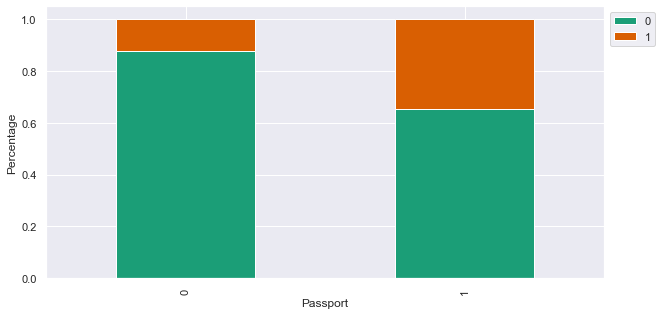

In [ ]:
stacked_plot(df.Passport)

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


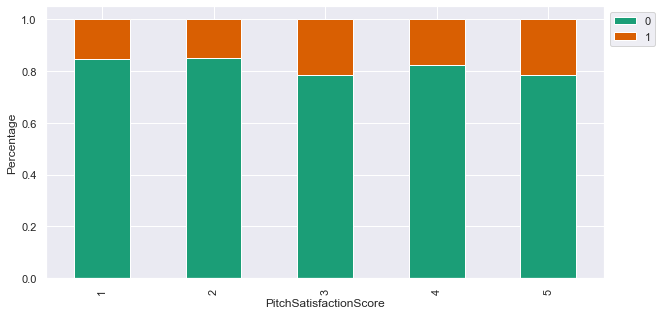

In [ ]:
stacked_plot(df.PitchSatisfactionScore)

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


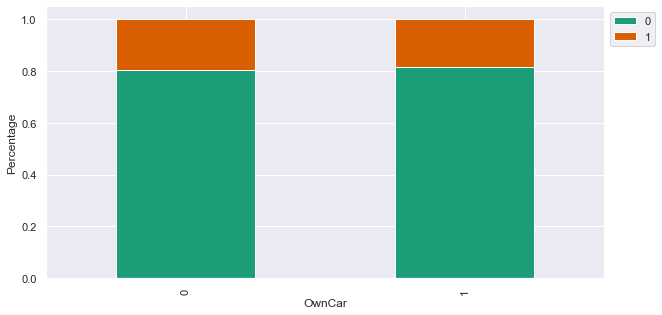

In [ ]:
stacked_plot(df.OwnCar)

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1747  399  2146
2.0                      1082  253  1335
3.0                       259   66   325
All                      3968  920  4888
------------------------------------------------------------------------------------------------------------------------


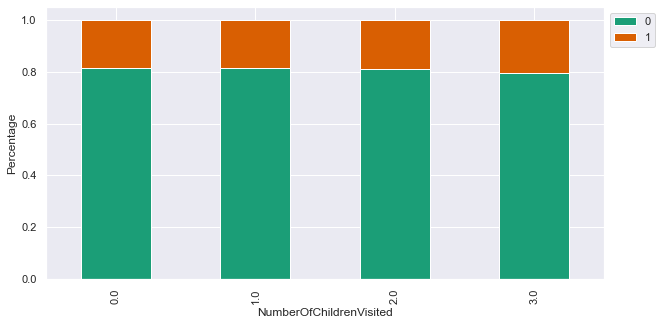

In [ ]:
stacked_plot(df.NumberOfChildrenVisited)

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


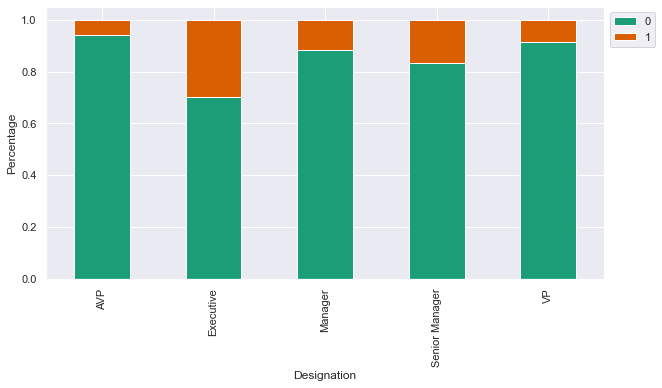

In [ ]:
stacked_plot(df.Designation)

In [ ]:
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                         

lower=Q1-1.5*IQR                   
upper=Q3+1.5*IQR

In [ ]:
outlier_num = df.select_dtypes(include=np.number)

In [ ]:
((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

Age                        0.000000
CityTier                   0.000000
CustomerID                 0.000000
DurationOfPitch            0.040917
MonthlyIncome              7.058101
NumberOfChildrenVisited    0.000000
NumberOfFollowups          6.382979
NumberOfPersonVisited      0.000000
NumberOfTrips              2.229951
OwnCar                     0.000000
Passport                   0.000000
PitchSatisfactionScore     0.000000
PreferredPropertyStar      0.000000
ProdTaken                  0.000000
dtype: float64

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0)
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] 
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))
    elif flag == False:
        return score_list 

In [ ]:
X= df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= df['ProdTaken']

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)
print(X_train.shape,X_test.shape)

(3421, 28) (1467, 28)


In [ ]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25)

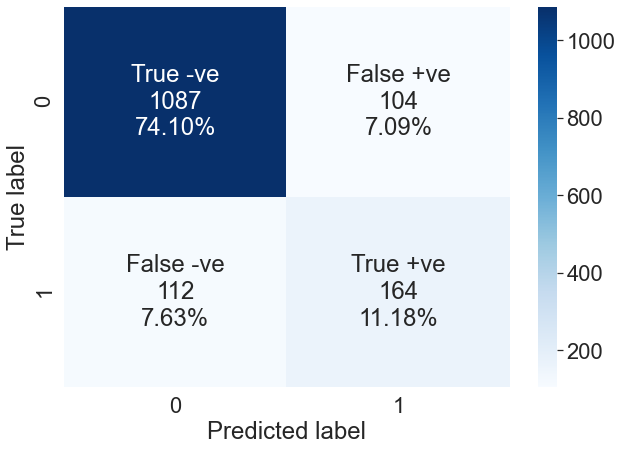

In [ ]:
Dt.fit(X_train, y_train) 
y_predict = Dt.predict(X_test) 
make_confusion_matrix(y_test,y_predict) 

In [ ]:
scores(Dt)

Accuracy on training set :  1.0
Accuracy on test set :  0.852760736196319

Recall on training set :  1.0
Recall on test set :  0.5942028985507246

Precision on training set :  1.0
Precision on test set :  0.6119402985074627

F1 on training set :  1.0
F1 on test set :  0.6029411764705882


In [ ]:
bagging = BaggingClassifier(random_state=25)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=25)

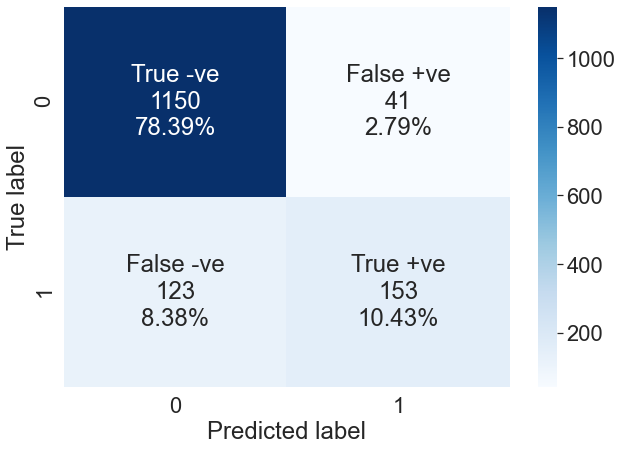

In [ ]:
y_predict = bagging.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(bagging)

Accuracy on training set :  0.9900613855597779
Accuracy on test set :  0.8882072256305386

Recall on training set :  0.953416149068323
Recall on test set :  0.5543478260869565

Precision on training set :  0.9935275080906149
Precision on test set :  0.788659793814433

F1 on training set :  0.9730586370839935
F1 on test set :  0.6510638297872341


In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25),random_state=25)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=25),
                  random_state=25)

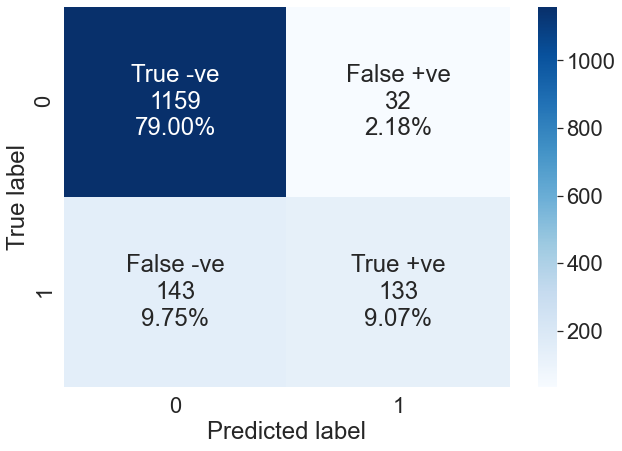

In [ ]:
y_predict = bagging_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(bagging_wt)

Accuracy on training set :  0.9894767611809413
Accuracy on test set :  0.8807089297886844

Recall on training set :  0.9456521739130435
Recall on test set :  0.48188405797101447

Precision on training set :  0.9983606557377049
Precision on test set :  0.806060606060606

F1 on training set :  0.9712918660287081
F1 on test set :  0.6031746031746031


There isnt any improvement in the metrics with the weighted Bagging classifier

In [ ]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

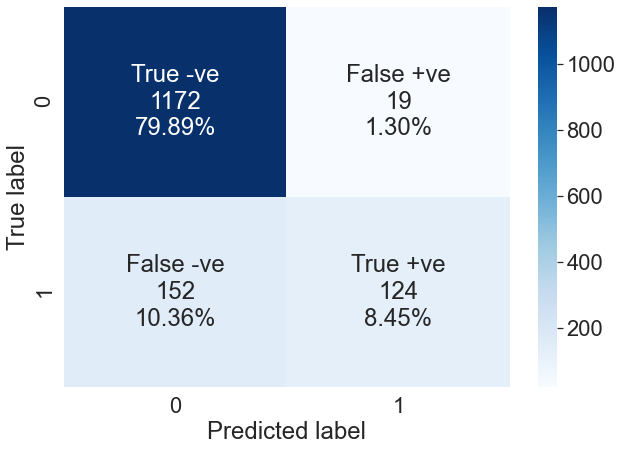

In [ ]:
y_predict = random_forest.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859

Recall on training set :  1.0
Recall on test set :  0.4492753623188406

Precision on training set :  1.0
Precision on test set :  0.8671328671328671

F1 on training set :  1.0
F1 on test set :  0.5918854415274463


In [ ]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

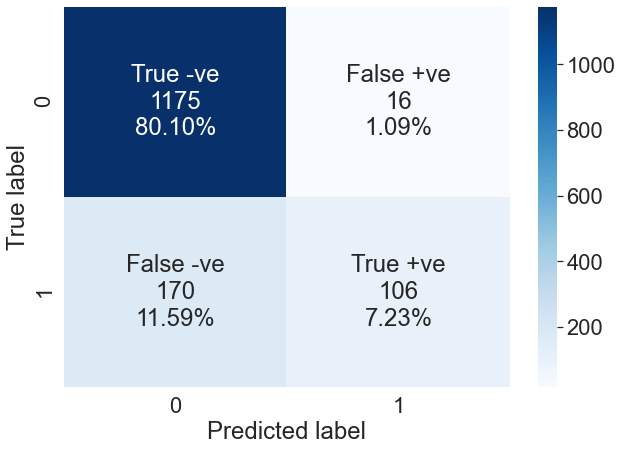

In [ ]:
y_predict = random_forest_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(random_forest_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.8732106339468303

Recall on training set :  1.0
Recall on test set :  0.38405797101449274

Precision on training set :  1.0
Precision on test set :  0.8688524590163934

F1 on training set :  1.0
F1 on test set :  0.5326633165829145


In [ ]:
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) 

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

F1_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
classifier = grid_obj.best_estimator_

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=25)

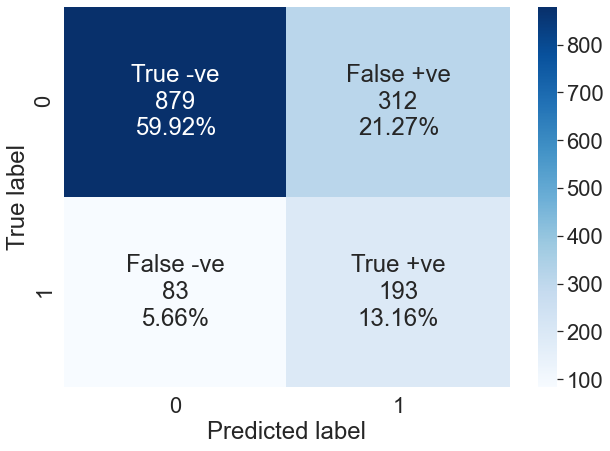

In [ ]:
y_predict = classifier.predict(X_test) 
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(classifier)

Accuracy on training set :  0.7380882782812044
Accuracy on test set :  0.7307430129516019

Recall on training set :  0.7391304347826086
Recall on test set :  0.6992753623188406

Precision on training set :  0.3953488372093023
Precision on test set :  0.3821782178217822

F1 on training set :  0.5151515151515151
F1 on test set :  0.4942381562099872


In [ ]:
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

bagging_tuned = BaggingClassifier(random_state=25,bootstrap=True)
F1_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

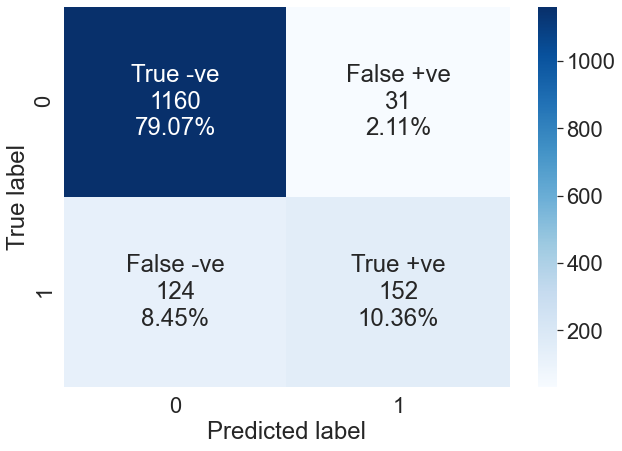

In [ ]:
y_predict = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.8943421949556919

Recall on training set :  0.9953416149068323
Recall on test set :  0.5507246376811594

Precision on training set :  1.0
Precision on test set :  0.8306010928961749

F1 on training set :  0.9976653696498053
F1 on test set :  0.6623093681917211


1)We see that the Train and Test Accuracy and F1Score Performance has increased after tuning compared to the previous models

2)The Model is over-fitting as the difference between Train and Test scores are very high.

3)The Model seems to identify all non-buyers better as the False Positve value is low.

In [ ]:
randomforest_tuned = RandomForestClassifier(random_state=29,class_weight = {0:.15,1:.85})

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}


F1_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(randomforest_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=7,
                       random_state=29)

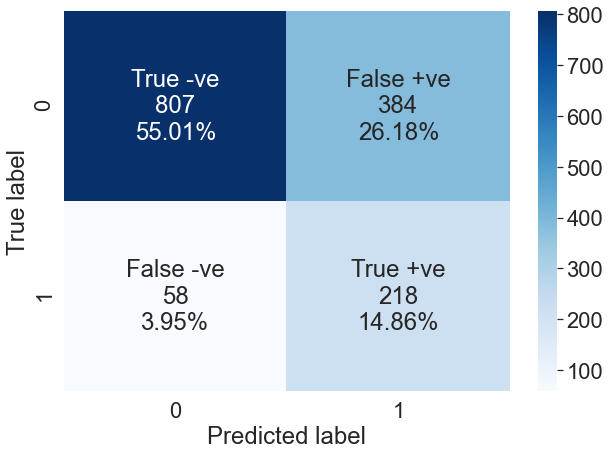

In [ ]:
y_predict = rf_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(rf_estimator_tuned)

Accuracy on training set :  0.712364805612394
Accuracy on test set :  0.6987048398091343

Recall on training set :  0.8074534161490683
Recall on test set :  0.7898550724637681

Precision on training set :  0.37681159420289856
Precision on test set :  0.36212624584717606

F1 on training set :  0.5138339920948617
F1 on test set :  0.49658314350797256


In [ ]:
Ada_boost = AdaBoostClassifier(random_state=25)
Ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=25)

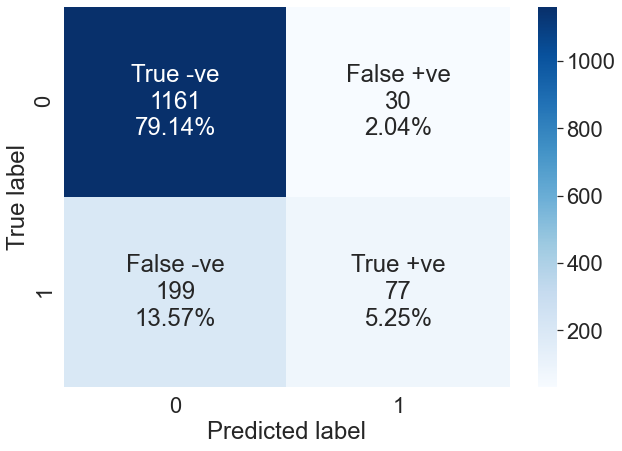

In [ ]:
y_pred = Ada_boost.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [ ]:
scores(Ada_boost)

Accuracy on training set :  0.8351359251680796
Accuracy on test set :  0.8438991138377642

Recall on training set :  0.25
Recall on test set :  0.27898550724637683

Precision on training set :  0.6652892561983471
Precision on test set :  0.719626168224299

F1 on training set :  0.36343115124153497
F1 on test set :  0.402088772845953


The metrics for ADA boost model is close and comparable for train and test set; but the F1 score is too low

In [ ]:
Grad_boost = GradientBoostingClassifier(random_state=25)
Grad_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=25)

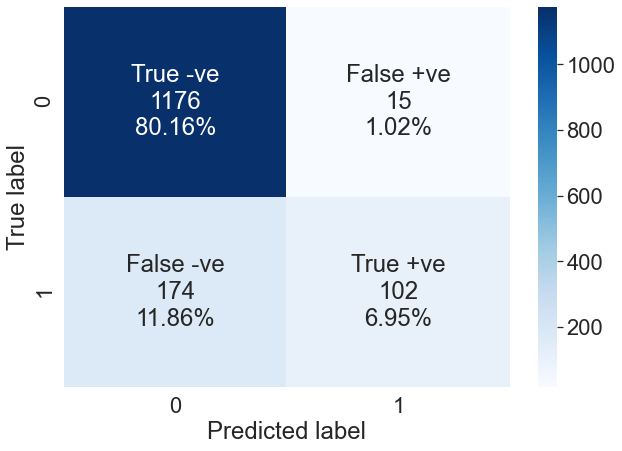

In [ ]:
y_predict = Grad_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(Grad_boost)

Accuracy on training set :  0.8786904413914061
Accuracy on test set :  0.8711656441717791

Recall on training set :  0.4332298136645963
Recall on test set :  0.3695652173913043

Precision on training set :  0.8480243161094225
Precision on test set :  0.8717948717948718

F1 on training set :  0.5734840698869477
F1 on test set :  0.5190839694656488


Again the metrics are comparable and close for both train and test set and the F1Score metric has increased.

In [ ]:
Grad_boost_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)
Grad_boost_ada.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),
                           random_state=25)

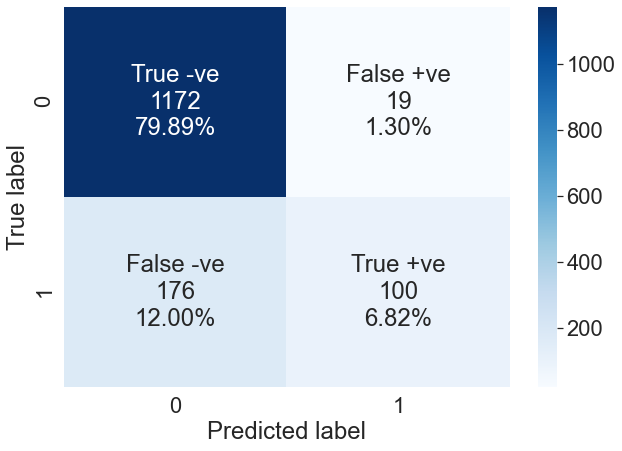

In [ ]:
y_predict = Grad_boost_ada.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(Grad_boost_ada)

Accuracy on training set :  0.8778135048231511
Accuracy on test set :  0.8670756646216768

Recall on training set :  0.42080745341614906
Recall on test set :  0.36231884057971014

Precision on training set :  0.8575949367088608
Precision on test set :  0.8403361344537815

F1 on training set :  0.5645833333333333
F1 on test set :  0.5063291139240507


The F1Score has dropped to 0.506


In [ ]:
from xgboost import XGBClassifier

In [ ]:
XG_boost = XGBClassifier(random_state=25, eval_metric='logloss')
XG_boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=25,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

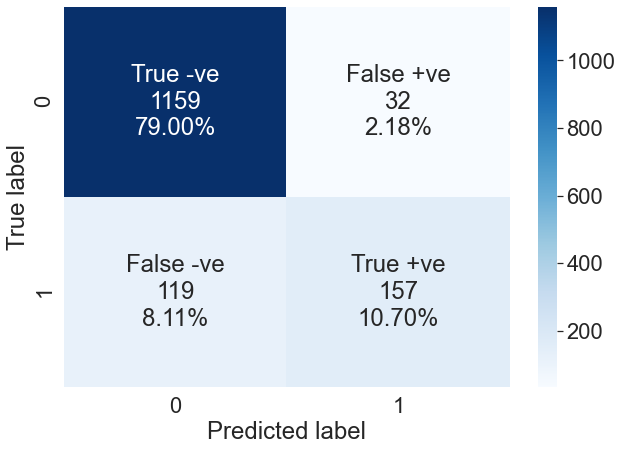

In [ ]:
y_predict = XG_boost.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(XG_boost)

Accuracy on training set :  0.9961999415375621
Accuracy on test set :  0.8970688479890934

Recall on training set :  0.9798136645962733
Recall on test set :  0.5688405797101449

Precision on training set :  1.0
Precision on test set :  0.8306878306878307

F1 on training set :  0.9898039215686275
F1 on test set :  0.675268817204301


XGBoost is overfitting the model but the F1Score of test set has increased

In [ ]:
Ada_tuned = AdaBoostClassifier(random_state=25)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,60,10),
    'learning_rate': [0.05,0.15,0.45,0.75]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(Ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

Ada_boost_tuned = grid_obj.best_estimator_

Ada_boost_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.75, random_state=25)

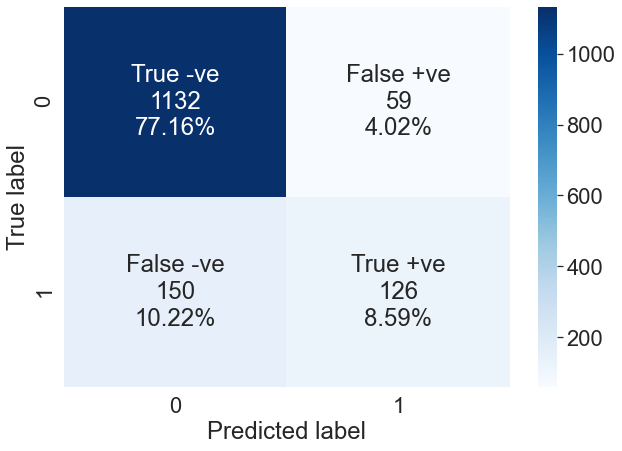

In [ ]:
y_pred = Ada_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_pred)

In [ ]:
scores(Ada_boost_tuned)

Accuracy on training set :  0.9239988307512423
Accuracy on test set :  0.8575323790047716

Recall on training set :  0.6708074534161491
Recall on test set :  0.45652173913043476

Precision on training set :  0.9
Precision on test set :  0.6810810810810811

F1 on training set :  0.7686832740213524
F1 on test set :  0.5466377440347071


In [ ]:
Grad_boost_ada_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),random_state=25)

parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    'learning_rate': [0.05,0.15,0.5]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(Grad_boost_ada_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

Grad_boost_tuned = grid_obj.best_estimator_

Grad_boost_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=25),
                           learning_rate=0.5, max_features=0.8, n_estimators=50,
                           random_state=25, subsample=0.8)

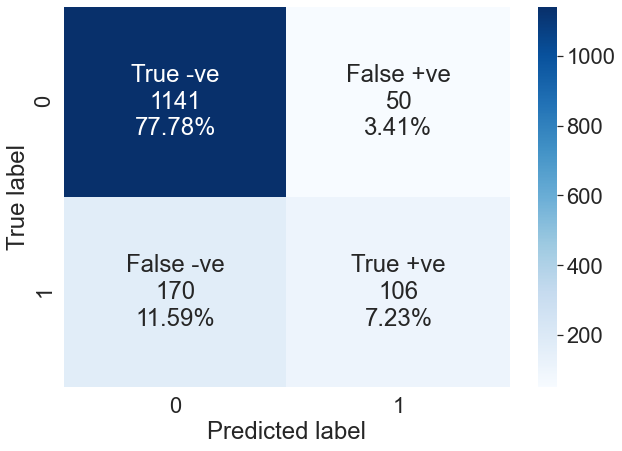

In [ ]:
y_predict = Grad_boost_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(Grad_boost_tuned)

Accuracy on training set :  0.9087985969014908
Accuracy on test set :  0.8500340831629175

Recall on training set :  0.5993788819875776
Recall on test set :  0.38405797101449274

Precision on training set :  0.8772727272727273
Precision on test set :  0.6794871794871795

F1 on training set :  0.7121771217712178
F1 on test set :  0.4907407407407407


In [ ]:
xgb_tuned = XGBClassifier(random_state=25, eval_metric='logloss')

parameters = {
    "n_estimators": np.arange(10,60,10),
     "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}
scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

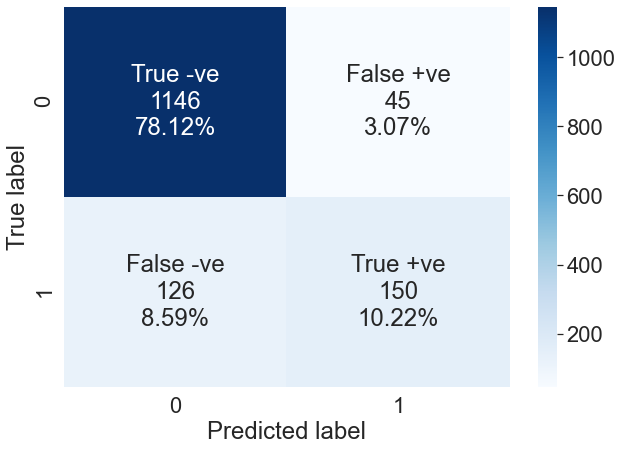

In [ ]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(xgb_tuned)

Accuracy on training set :  0.9918152586962876
Accuracy on test set :  0.8834355828220859

Recall on training set :  0.9627329192546584
Recall on test set :  0.5434782608695652

Precision on training set :  0.9935897435897436
Precision on test set :  0.7692307692307693

F1 on training set :  0.9779179810725552
F1 on test set :  0.6369426751592356


The accuracy and F1score has increased, despite slight overfitting.

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('Random Forest',rf_estimator_tuned),('ADA Boosting',Ada_boost_tuned),('Decision Tree',classifier)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.15,
                                                                     1: 0.85},
                                                       criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=15,
                                                       min_samples_leaf=7,
                                                       random_state=29)),
                               ('ADA Boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                   learning_rate=0.75,
                                                   random_state=25)),
                               ('Decision Tree',
                                DecisionTreeClassifier(cl...
                        

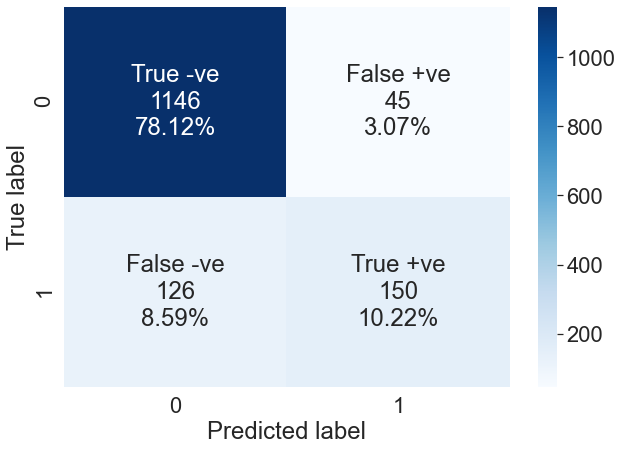

In [ ]:
y_predict = xgb_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [ ]:
scores(stacking_classifier)

Accuracy on training set :  0.8897983045893014
Accuracy on test set :  0.8214042263122018

Recall on training set :  0.6366459627329193
Recall on test set :  0.427536231884058

Precision on training set :  0.7414104882459313
Precision on test set :  0.5315315315315315

F1 on training set :  0.6850459482038429
F1 on test set :  0.4738955823293173


In [ ]:
all_models = [Dt, classifier,bagging,bagging_estimator_tuned,random_forest, rf_estimator_tuned,
          Ada_boost, Ada_boost_tuned, Grad_boost, Grad_boost_tuned, XG_boost,xgb_tuned, stacking_classifier]

acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Tuned Bagging Classifier ',
                                          'Random Forest','Tuned Random Forest','AdaBoost Classifier','Tuned AdaBoost Classifier',
                                          'Gradient Boosting Classifier', 'Tuned Gradient Boosting Classifier',
                                          'XGBoost Classifier',  'Tuned XGBoost Classifier', 'Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_F1-Score,Test_F1-Score
10,XGBoost Classifier,0.996200,0.897069,0.989804,0.675269
3,Tuned Bagging Classifier,0.999123,0.894342,0.997665,0.662309
2,Bagging Classifier,0.990061,0.888207,0.973059,0.651064
11,Tuned XGBoost Classifier,0.991815,0.883436,0.977918,0.636943
0,Decision Tree,1.000000,0.852761,1.000000,0.602941
4,Random Forest,1.000000,0.883436,1.000000,0.591885
7,Tuned AdaBoost Classifier,0.923999,0.857532,0.768683,0.546638
8,Gradient Boosting Classifier,0.878690,0.871166,0.573484,0.519084
5,Tuned Random Forest,0.712365,0.698705,0.513834,0.496583
1,Tuned Decision Tree,0.738088,0.730743,0.515152,0.494238


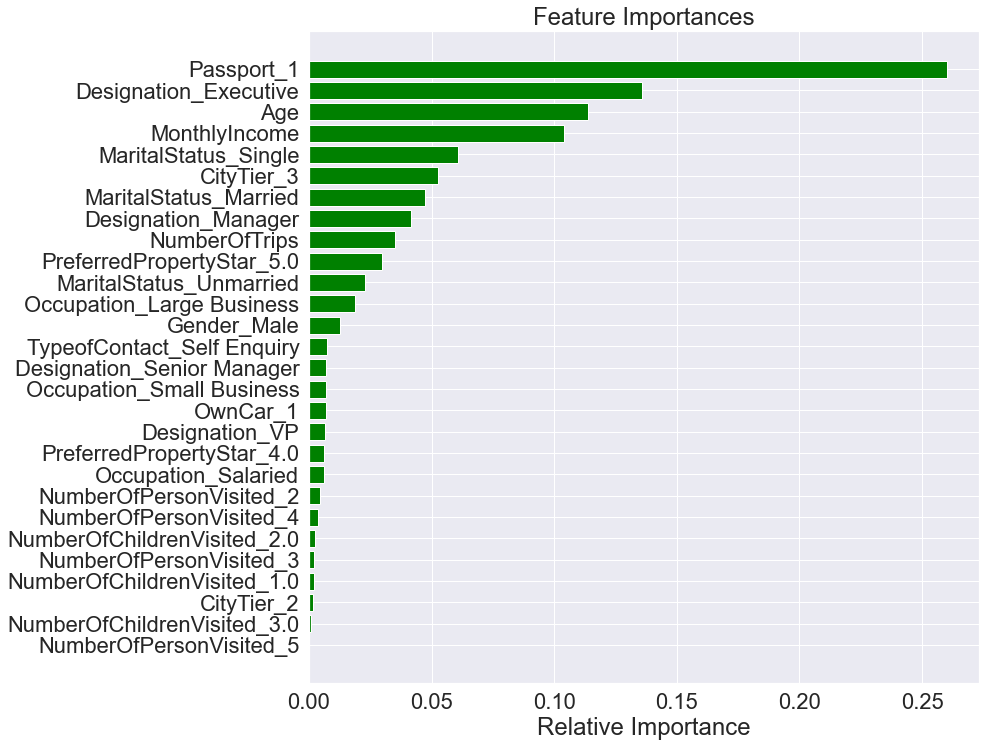

In [ ]:
feature_names = X_train.columns
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
scores(rf_estimator_tuned) 

Accuracy on training set :  0.712364805612394
Accuracy on test set :  0.6987048398091343

Recall on training set :  0.8074534161490683
Recall on test set :  0.7898550724637681

Precision on training set :  0.37681159420289856
Precision on test set :  0.36212624584717606

F1 on training set :  0.5138339920948617
F1 on test set :  0.49658314350797256
